 # <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Project in Natural Language Processing

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Import all required modules

In [10]:
%matplotlib inline

import math as math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> PART - A Digital content management

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  1.A Clearly write outcome of data analysis

In [129]:
import zipfile

In [130]:
zip = zipfile.ZipFile('blogs.zip')
df = pd.read_csv(zip.open('blogtext.csv'))

In [131]:
df

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [133]:
#data = df.sample(10000, ignore_index=True, random_state=46)
# Initially I tried with 10K sample the system goes slow. Let us try to finish things up with 3K and later increase the 
# sample size to 10K. Please note we have huge sample set and 3K, 10K is subset to save memory and CPU hogging.
#df = df.sample(3000, ignore_index=True, random_state=46)
df = df.head(3000)

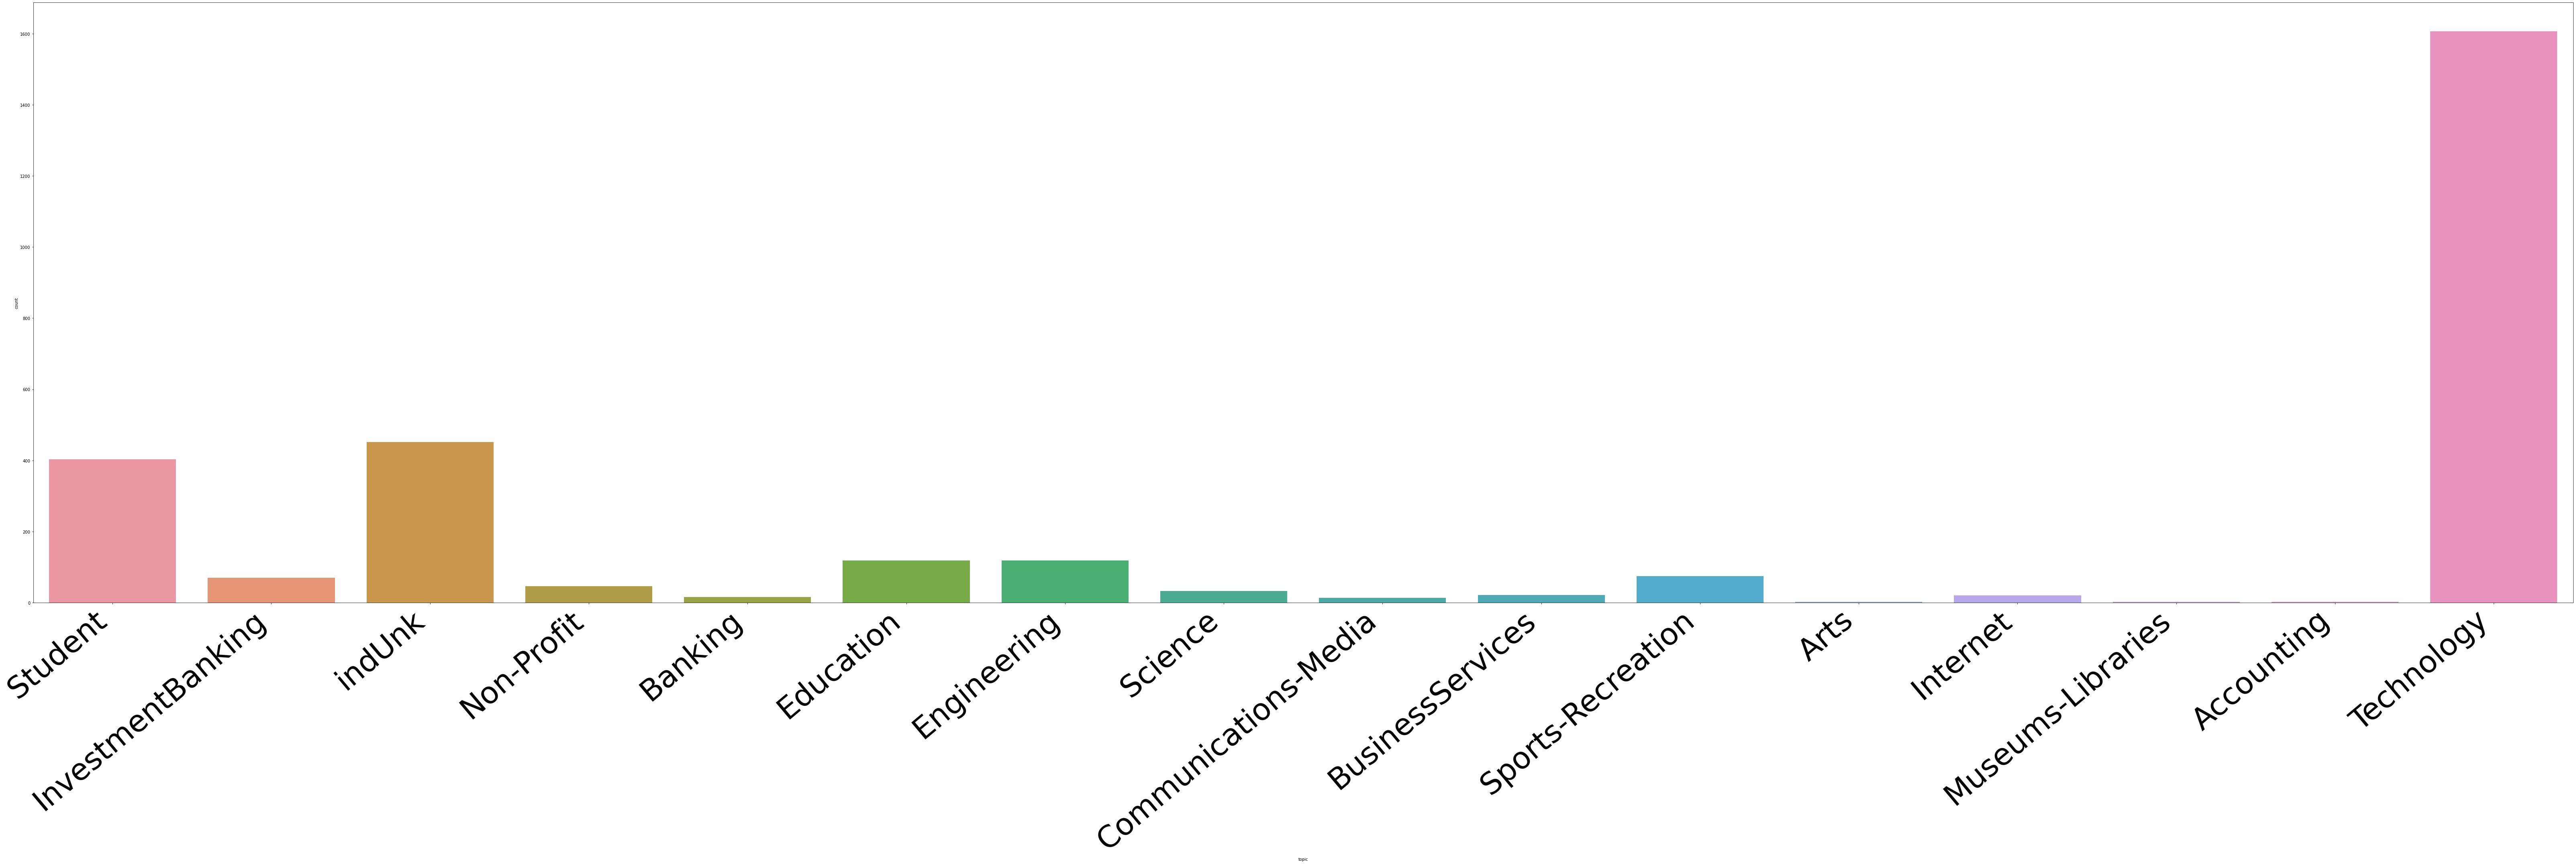

In [134]:
plt.figure(figsize=(90,30))
ax = sns.countplot(x=df["topic"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=75)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

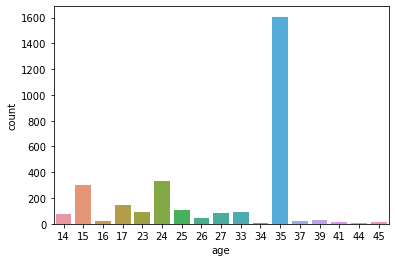

In [135]:
sns.countplot(x=df["age"])

<AxesSubplot:xlabel='gender', ylabel='count'>

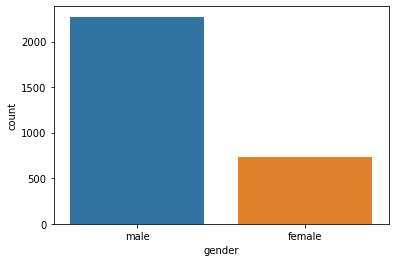

In [136]:
sns.countplot(x=df["gender"])

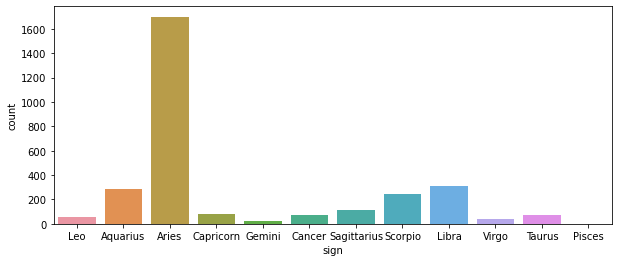

In [137]:
plt.figure(figsize=(10,4))
sns.countplot(x=df["sign"])
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkblack;">  <li>We have 681K records with 8 column. There were two column such as ID and Age are represented as number and remaining features are object type</li> <li> We do not see any null values </li> <li> We have equal number of blogs from male and female.</li> <li> From age 15 to 27, in each age group there are 40K+ blogs</li> <li> The bloggers are usually from various zodiac sign. </li> <li> We have more blogs from student and INdUNk topic </li>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  1.B Clean the Structured Data (Missing value analysis and imputation)

In [138]:
df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkblack;">  There is no missing value 

In [139]:
!pip install wordcloud

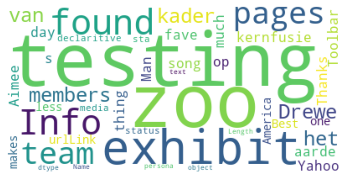

In [140]:
# create a word cloud to understand the spread
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(df['text']))

plt.imshow(word_cloud, interpolation=None)
plt.axis("off")
plt.show()

In [141]:
data = df

In [142]:
# There is no usage on ID column - remove it
#data.drop(['id'], axis=1, inplace=True)

In [143]:
data.sample(2)

,id,gender,age,topic,sign,date,text
2167,589736,male,35,Technology,Aries,"05,August,2004","'...We are reminded that, in power,..."
196,3389918,female,37,indUnk,Aquarius,"20,May,2004",Consistency is the last refuge of the u...


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  1.B Clean the Structured Data (Eliminate Non-English textual data.)

In [144]:
!pip install langdetect

In [145]:
from langdetect import detect

In [146]:
#df['text'].apply(detect)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkblack;">  Detect was throwing error. Sounds like there is some data which is not detectable using langdetect. Analysing them is outside of this project

In [147]:
for i in range(len(data)):
    text_input = data.loc[i, 'text']
    try:
        lang=detect(text_input)                                      
    except:                                                       
        lang='nil'
        print(f"{text_input} = {lang}")
    data.loc[i, 'lang'] = lang 
    #langdet.append(lang) 

C:\Users\MSS\AppData\Local\Temp\ipykernel_24788\1655948361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i, 'lang'] = lang


                         = nil


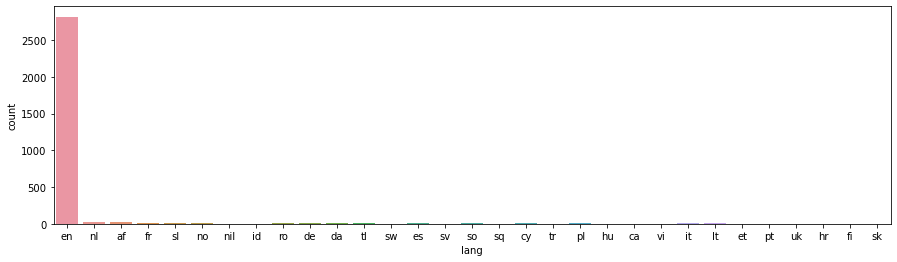

In [148]:
plt.figure(figsize=(15,4))
sns.countplot(x=data["lang"])
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkblack;">  Majority is english we have few non english words detected by langdetect tool. We can ignore them as they are negligible in count

In [149]:
df_en = data.loc[data['lang'].isin(['en'])]

In [150]:
df_en.sample()

,id,gender,age,topic,sign,date,text,lang
1637,589736,male,35,Technology,Aries,"05,August,2004",i've only been in classes for one w...,en


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  2.A Eliminate All special Characters and Numbers,  2.B Remove all Stopwords, 2.B Remove all extra white spaces

In [151]:
import re
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
#stopwords

In [152]:
# Select only alphabets
#import re
#df_en['clean_text'] = df_en.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

# Convert text to lowercase
#df_en['clean_text'] = df_en.clean_text.apply(lambda x: x.lower())

# Strip unwanted spaces
#df_en['clean_text'] = df_en.clean_text.apply(lambda x: x.strip())

# Remove stopwords
#df_en['clean_text'] = df_en.clean_text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [153]:
# Few rows were containing junk data an throwing exception
# Catch and ignore them
if (True):
    for row in range(len(df_en)):
        try:
            input_text = df_en.loc[row, 'text'].split()
            clean_text = ''
            for word in input_text:
                if word not in stopwords:
                    word = re.sub('[()!?]', '', word)
                    word = re.sub('\[.*?\]','', word)
                    word = re.sub("[^A-Za-z]+",'', word)
                    word = word.lower()
                    clean_text = clean_text + " " + word
                df_en.loc[row, 'clean_text'] = clean_text
        except:
            print("The row causing error is", row)

C:\Users\MSS\AppData\Local\Temp\ipykernel_24788\1287705972.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en.loc[row, 'clean_text'] = clean_text


The row causing error is 1
The row causing error is 138
The row causing error is 150
The row causing error is 237
The row causing error is 318
The row causing error is 325
The row causing error is 437
The row causing error is 716
The row causing error is 751
The row causing error is 753
The row causing error is 754
The row causing error is 755
The row causing error is 756
The row causing error is 757
The row causing error is 759
The row causing error is 760
The row causing error is 761
The row causing error is 762
The row causing error is 764
The row causing error is 766
The row causing error is 782
The row causing error is 786
The row causing error is 787
The row causing error is 788
The row causing error is 800
The row causing error is 802
The row causing error is 804
The row causing error is 805
The row causing error is 806
The row causing error is 1163
The row causing error is 1164
The row causing error is 1248
The row causing error is 1258
The row causing error is 1259
The row cau

In [154]:
df_en

,id,gender,age,topic,sign,date,text,lang,clean_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",en,info found pages mb pdf files now wait unt...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,en,in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,en,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,en,thanks yahoos toolbar i capture urls popupswh...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...,en,i interesting conversation dad morning we tal...
...,...,...,...,...,...,...,...,...,...
2995,589736,male,35,Technology,Aries,"05,August,2004",but that zoo exhibit thing was much...,en,NaN
2996,589736,male,35,Technology,Aries,"05,August,2004",my fave song for the day: Aimee Man...,en,NaN
2997,589736,male,35,Technology,Aries,"05,August,2004",urlLink America's Best Zoo Exhibit...,en,NaN
2998,589736,male,35,Technology,Aries,"05,August,2004",'The less one makes declaritive sta...,en,NaN


In [155]:
df_en.isna().sum()

id              0
gender          0
age             0
topic           0
sign            0
date            0
text            0
lang            0
clean_text    166
dtype: int64

In [156]:
df_en = df_en.dropna()
df_en

,id,gender,age,topic,sign,date,text,lang,clean_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",en,info found pages mb pdf files now wait unt...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,en,in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,en,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,en,thanks yahoos toolbar i capture urls popupswh...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...,en,i interesting conversation dad morning we tal...
...,...,...,...,...,...,...,...,...,...
2813,589736,male,35,Technology,Aries,"05,August,2004",why is it we can know something so ...,en,know something firmly completely intellectual...
2814,589736,male,35,Technology,Aries,"05,August,2004","For that matter, one could say all ...",en,for matter one could say ideologies absolutist
2815,589736,male,35,Technology,Aries,"05,August,2004",Cameron Frye was the legendary best...,en,cameron frye legendary best friend ferris whe...
2816,589736,male,35,Technology,Aries,"05,August,2004","Mir, my dear...liberals are also ab...",en,mir dearliberals also absolutistic though pro...


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 3.A Create dependent and independent variables

In [157]:
X = df_en['clean_text']
Y = df_en['topic']

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 3.B Split data into train and test

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train, x_test,y_train, y_test = train_test_split(X,Y, random_state=104, test_size=0.20, shuffle=True)

In [160]:
print(f"{x_train.shape},{y_train.shape},{x_test.shape},{y_test.shape}")

(2121,),(2121,),(531,),(531,)


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 3.C. Vectorize data using any one vectorizer

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

In [162]:
vectorizer=CountVectorizer(binary=True, ngram_range=(1,2))
x_train_cv = vectorizer.fit_transform(x_train)
x_test_cv = vectorizer.transform(x_test)

In [163]:
vectorizer.get_feature_names_out()[:5]

array(['aa', 'aa anger', 'aa compared', 'aa nice', 'aaa'], dtype=object)

In [164]:
#vectorizer.get_feature_names()
# Visualize as dataframe and take only 100 rows as taking 7k records running out of memory 
cv_df = pd.DataFrame(x_train_cv[:100].todense(),columns=vectorizer.get_feature_names_out())
print(cv_df.shape)
cv_df.loc[:, (cv_df > 0).any()]

(100, 189512)


,abcfamily,abcfamily tapes,ablaze,ablaze lot,able,able caddy,able post,about,about elizabeth,about piano,...,youth,youth im,yukon,yukon chevrolet,yulis,yulis wedding,zealand,zealand herald,zero,zero evidence
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
#y_value_counts = y_train.value_counts().to_dict()
#y_value_counts

In [166]:
#sorted(y_value_counts.keys())

In [167]:
label_counts = dict()
for labels in df.topic.values:
    #print(labels)
    for label in labels:
        #print(label)
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

In [168]:
label_counts

{'S': 532,
 't': 1318,
 'u': 562,
 'd': 987,
 'e': 2725,
 'n': 3948,
 'I': 90,
 'v': 91,
 's': 251,
 'm': 100,
 'B': 107,
 'a': 309,
 'k': 538,
 'i': 1138,
 'g': 1933,
 'U': 452,
 'N': 46,
 'o': 3604,
 '-': 137,
 'P': 46,
 'r': 362,
 'f': 46,
 'E': 237,
 'c': 1905,
 'C': 14,
 'M': 16,
 'p': 75,
 'R': 75,
 'A': 4,
 'L': 2,
 'b': 2,
 'T': 1607,
 'h': 1607,
 'l': 1607,
 'y': 1607}

In [169]:
from sklearn.preprocessing import MultiLabelBinarizer

binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

In [170]:
y_train[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [171]:
print(f"{x_train_cv.shape},{y_train.shape},{x_test_cv.shape},{y_test.shape}")

(2121, 189512),(2121, 35),(531, 189512),(531, 35)


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 3.D. Build a base model for Supervised Learning - Classification

In [172]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

report_df_all = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'name'])
def print_evaluation_scores(y_val, predicted, name=None):
    report_df = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'name'])
    report_df.loc[0,'accuracy'] = accuracy_score(y_val, predicted)
    report_df['f1'] = f1_score(y_val, predicted, average='micro')
    report_df['precision'] = average_precision_score(y_val, predicted, average='micro')
    report_df['recall'] = recall_score(y_val, predicted, average='micro')
    report_df['name'] = name
    global report_df_all
    if report_df_all.empty:
        report_df_all = report_df
    else:
        report_df_all = report_df_all.append(report_df, ignore_index=True)
    return report_df

In [173]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

def eval_svm(X_train, Y_train, X_test, Y_test):
    svm_clf = svm.SVC();
    svm_clf_ovr = OneVsRestClassifier(svm_clf)
    svm_clf_ovr.fit(X_train , Y_train)
    pl = svm_clf_ovr.predict(X_test)
    return svm_clf, pl

In [174]:
svm_cv_model, svm_prediction_cv = eval_svm(x_train_cv, y_train, x_test_cv, y_test)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 3.E. Clearly print Performance Metrics

In [175]:
print_evaluation_scores(y_test, svm_prediction_cv, 'svm_prediction_cv')

,accuracy,precision,recall,f1,name
0,0.482109,0.641122,0.721642,0.760138,svm_prediction_cv


In [176]:
print('Classification Report: \n{}'.format(classification_report(y_test, svm_prediction_cv)))

Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00         0
           2       1.00      0.07      0.13        14
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        11
          11       1.00      0.06      0.11        89
          12       0.77      0.93      0.84       272
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00        44
          15       0.00      0.00      0.00         0
          16       0.78      0.86      0.82       310
   

E:\Software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 4.A. Experiment with other vectorisers

In [177]:
# Let us experiment TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf = tfidf.fit(x_train.append(x_test))
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

C:\Users\MSS\AppData\Local\Temp\ipykernel_24788\1362592410.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tfidf = tfidf.fit(x_train.append(x_test))


In [178]:
tfidf_df = pd.DataFrame(x_train_tfidf[:100].todense(),columns=tfidf.get_feature_names())
print(tfidf_df.shape)
#tfidf_df.sample(10)
tfidf_df.loc[:, (tfidf_df > 0).any()]

(100, 26312)


E:\Software\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abcfamily,ablaze,able,about,absolulty,absolute,absolutely,abuse,accents,access,...,york,you,younger,your,youre,youth,yukon,yulis,zealand,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.078523,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.051945,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057879,0.0,...,0.0,0.019703,0.0,0.0,0.068418,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [179]:
svm_tfidf_model, svm_prediction_tfidf = eval_svm(x_train_tfidf, y_train, x_test_tfidf, y_test)

In [180]:
print('Classification Report: \n{}'.format(classification_report(y_test, svm_prediction_tfidf)))

Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67        14
           3       0.00      0.00      0.00         0
           4       1.00      0.06      0.12        49
           5       1.00      0.43      0.60        14
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        11
          11       1.00      0.21      0.35        89
          12       0.86      0.90      0.88       272
          13       1.00      0.06      0.11       100
          14       1.00      0.18      0.31        44
          15       0.00      0.00      0.00         0
          16       0.81      0.91      0.86       310
   

E:\Software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
print_evaluation_scores(y_test, svm_prediction_tfidf, 'svm_prediction_tfidf')

C:\Users\MSS\AppData\Local\Temp\ipykernel_24788\1912503749.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df_all = report_df_all.append(report_df, ignore_index=True)


,accuracy,precision,recall,f1,name
0,0.497175,0.704696,0.760019,0.805716,svm_prediction_tfidf


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 4.B. Build classifier Models using other algorithms than base model

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
# Function to be called to evaluate using LogisticRegression
def eval_lr(X_train, Y_train, X_test, Y_test):
    model = LogisticRegression(solver='lbfgs')
    ovr = OneVsRestClassifier(model)
    ovr.fit(X_train, Y_train)
    pl = ovr.predict(X_test)
    return ovr, pl

In [184]:
lr_cv_model, lr_prediction_cv = eval_lr(x_train_cv, y_train, x_test_cv, y_test)

In [185]:
print_evaluation_scores(y_test, lr_prediction_cv, 'lr_cv')
#print('Classification Report: \n{}'.format(classification_report(y_test, lr_prediction_cv)))

C:\Users\MSS\AppData\Local\Temp\ipykernel_24788\1912503749.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df_all = report_df_all.append(report_df, ignore_index=True)


,accuracy,precision,recall,f1,name
0,0.538606,0.720935,0.804469,0.822959,lr_cv


In [186]:
lr_tfidf_model, lr_prediction_tfidf = eval_lr(x_train_tfidf, y_train, x_test_tfidf, y_test)

In [187]:
print_evaluation_scores(y_test, lr_prediction_tfidf, 'lr_tfidf')

C:\Users\MSS\AppData\Local\Temp\ipykernel_24788\1912503749.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df_all = report_df_all.append(report_df, ignore_index=True)


,accuracy,precision,recall,f1,name
0,0.47081,0.693311,0.745932,0.796318,lr_tfidf


In [188]:
report_df_all

,accuracy,precision,recall,f1,name
0,0.482109,0.641122,0.721642,0.760138,svm_prediction_cv
1,0.497175,0.704696,0.760019,0.805716,svm_prediction_tfidf
2,0.538606,0.720935,0.804469,0.822959,lr_cv
3,0.47081,0.693311,0.745932,0.796318,lr_tfidf


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkblack;">  <li>Linear Regression with count vectorizer gives better result than other combination. The TFIDF vectorizer is comparable. The SVM model is also comparable</li>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 4.C. Tune Parameters/Hyperparameters of the model/s.

In [189]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

In [190]:
# We get following error due to OVR used with LR. The estimators keys that we can use can be retrieved using get_prams().keys()
# Get and use only them.
# ValueError: Invalid parameter C for estimator OneVsRestClassifier(estimator=LogisticRegression()). Check the 
#             list of available parameters with `estimator.get_params().keys()`.


In [191]:
print(lr_cv_model.get_params().keys())

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])


In [192]:
lr_params = {'estimator__penalty': ['l1','l2'],
          'estimator__solver':['liblinear','lbfgs'],
          'estimator__C': np.logspace(-10,10,21)}

# Define the gridsearchCV
lr_grid_cv = GridSearchCV(lr_cv_model, param_grid=lr_params, cv=3, n_jobs=-1, verbose=1)

# fit with the tranformed sparse matrix
lr_grid_cv.fit(x_train_cv, y_train)

print(lr_grid_cv.best_score_)


# assign the best estimator to a variable
best_lr = lr_grid_cv.best_estimator_
print(f"Best Parameters: {lr_grid_cv.best_params_}");

Fitting 3 folds for each of 84 candidates, totalling 252 fits


E:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
63 fits failed out of a total of 252.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Software\anaconda3\lib\site-packages\sklearn\multiclass.py", line 337, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs)(
  File "E:\Software\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Software\anaconda3\lib\site-

0.4898632720414899
Best Parameters: {'estimator__C': 10000.0, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}


In [193]:
lr_grid_cv.cv_results_

{'mean_fit_time': array([4.17792511e+00, 4.93375460e-02, 5.85310562e+00, 1.38087388e+02,
        5.24754222e+00, 3.26659679e-02, 5.47351853e+00, 1.28200585e+02,
        4.45653423e+00, 3.55862776e-02, 5.80002014e+00, 1.24921866e+02,
        4.42804972e+00, 3.66701285e-02, 8.16233333e+00, 1.18245213e+02,
        5.26899823e+00, 2.60055065e-02, 8.94533563e+00, 1.23756914e+02,
        5.50471560e+00, 4.33277289e-02, 9.90156198e+00, 1.11151424e+02,
        4.12781707e+00, 4.83330886e-02, 1.32363381e+01, 9.93192937e+01,
        3.77099975e+00, 3.39898268e-02, 1.52304524e+01, 1.01969528e+02,
        2.89341947e+01, 3.96663348e-02, 2.60390983e+01, 1.38049264e+02,
        6.45197582e+01, 2.59994666e-02, 4.26470343e+01, 2.03393985e+02,
        8.94061988e+01, 4.10041014e-02, 6.42529242e+01, 2.63954940e+02,
        1.14124537e+02, 4.46656545e-02, 9.04122989e+01, 3.10578965e+02,
        1.11605689e+02, 4.57069079e-02, 1.01368848e+02, 2.99261882e+02,
        1.16806334e+02, 3.80029678e-02, 9.75450

In [194]:
# Function to be called to evaluate using LogisticRegression
def eval_lr_updated(X_train, Y_train, X_test, Y_test):
    model = LogisticRegression(solver='liblinear', penalty='l2', C=100000.0)
    ovr = OneVsRestClassifier(model)
    ovr.fit(X_train, Y_train)
    pl = ovr.predict(X_test)
    return ovr, pl

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 4.D. Clearly print Performance Metrics

In [195]:
lr_update_cv_model, lr_update_prediction_cv = eval_lr_updated(x_train_cv, y_train, x_test_cv, y_test)

In [196]:
print_evaluation_scores(y_test, lr_update_prediction_cv, 'lr_update_prediction_cv')

C:\Users\MSS\AppData\Local\Temp\ipykernel_24788\1912503749.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df_all = report_df_all.append(report_df, ignore_index=True)


,accuracy,precision,recall,f1,name
0,0.54049,0.700461,0.815157,0.812099,lr_update_prediction_cv


In [197]:
lr_update_tfidf_model, lr_update_prediction_tfidf = eval_lr_updated(x_train_tfidf, y_train, x_test_tfidf, y_test)

In [198]:
print_evaluation_scores(y_test, lr_update_prediction_tfidf, 'lr_update_prediction_tfidf')

C:\Users\MSS\AppData\Local\Temp\ipykernel_24788\1912503749.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df_all = report_df_all.append(report_df, ignore_index=True)


,accuracy,precision,recall,f1,name
0,0.538606,0.752271,0.820743,0.843801,lr_update_prediction_tfidf


In [200]:
cross_val_score(lr_update_cv_model, x_train_cv, y_train, cv=3)

array([0.47241867, 0.51343706, 0.48373409])

In [202]:
cross_val_score(lr_update_tfidf_model, x_train_tfidf, y_train, cv=3)

array([0.48514851, 0.52758133, 0.50636492])

In [203]:
report_df_all

,accuracy,precision,recall,f1,name
0,0.482109,0.641122,0.721642,0.760138,svm_prediction_cv
1,0.497175,0.704696,0.760019,0.805716,svm_prediction_tfidf
2,0.538606,0.720935,0.804469,0.822959,lr_cv
3,0.47081,0.693311,0.745932,0.796318,lr_tfidf
4,0.54049,0.700461,0.815157,0.812099,lr_update_prediction_cv
5,0.538606,0.752271,0.820743,0.843801,lr_update_prediction_tfidf


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 5.A. Which vectorizer performed better? Probable reason?.

##### The count vectorizer shows slightly improved accuracy as we are dealing with less data. It is possible that the TFIDF can give better result when we  train the model with all documents. Having said that we should consider F1 Score for this dataset as we should maximize both Precision and recall. Considering this, we should choose Hyper parameter tunned LR model with TFIDF Vectorized data. 

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 5.B. Which model outperformed? Probable reason?

##### The logistic regression for classifier performs well as works over probabilitics classification.

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 5.C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?.

##### We ran GridSearch with LR algorithm and found solver='liblinear', penalty='l2', C=100000.0 giving good performance. The value is suggested by GS because the dataset is small.

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> 5.D. According to you, which performance metric should be given most importance, why?.

##### F1 Score - As we should maximize both accuracy and recall for this dataset.

# <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> PART - B  Customer support Chatbot

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> B 1. Start chat session with greetings and ask what the user is looking for

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> B 2. Accept dynamic text-based questions from the user. Reply back with relevant answer from the designed corpus. 

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> B.3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

In [4]:
# Import given JSON
import json

In [22]:
with open('GL Bot.json') as file:
    Corpus = json.load(file)

print(Corpus)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [6]:
#Import NLTK library
import nltk

In [7]:
#nltk.download('punkt')

In [11]:
W = []
L = []
doc_x = []
doc_y = []

for intent in Corpus['intents']:
    for pattern in intent['patterns']:
        #print(pattern)
        w_temp = nltk.word_tokenize(pattern)
        W.extend(w_temp)
        doc_x.append(w_temp)
        doc_y.append(intent["tag"])

    if intent['tag'] not in L:
        L.append(intent['tag'])

np.unique(doc_y)
#doc_x
#W
#L

array(['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket'],
      dtype='<U7')

In [12]:
from nltk.stem import PorterStemmer

In [13]:
stemmer = PorterStemmer()
W = [stemmer.stem(w.lower()) for w in W if w != "?"]
W = sorted(list(set(W)))
L = sorted(L)
L

['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']

In [14]:
Train = []
Target = []

out_empty = [0 for _ in range(len(L))]

for x, doc in enumerate(doc_x):
    bag = []
    w_temp = [stemmer.stem(w.lower()) for w in doc]
    
    for w in W:
        if w in w_temp:
            bag.append(1)
        else:
            bag.append(0)
    
    output_row = out_empty[:]
    output_row[L.index(doc_y[x])]=1
    
    Train.append(bag)
    Target.append(output_row)


In [15]:
len(Train[0])

154

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [17]:
model = Sequential()
model.add(Dense(64, input_dim=len(Train[0]), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [18]:
def bag_of_words(pattern):
    bag = []
    input_words = []
    words = nltk.word_tokenize(pattern)
    input_words.append(words)
    
    for x, doc in enumerate(input_words):
        w_temp = [stemmer.stem(w.lower()) for w in doc]
        for w in W:
            if w in w_temp:
                bag.append(1)
            else:
                bag.append(0)
    #print(bag)
    return bag
    

In [19]:
L

['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']

In [23]:
def chat():
    print("Chat with komban (type:stop to quit)")
    print("If answer is not right (type: *)")
    while True:
        inp = input("\n\nYou:")
        if (inp.lower() == "*"):
            print("komban: Please rephrase your question")
        if (inp.lower() == "stop"):
            break
        
        results = model.predict([bag_of_words(inp)])
        #print(results)
        results_index = np.argmax(results)
        tag = L[results_index]
        
        for tg in Corpus["intents"]:
            if tg['tag'] == tag:
                response = tg['responses']
                print(response)

chat()

Chat with komban (type:stop to quit)
If answer is not right (type: *)


You:Hi
1/1 [==============================] - 0s 38ms/step
['Hello! how can i help you ?']


You:I am not able to understand knn
1/1 [==============================] - 0s 34ms/step
['Link: Olympus wiki']


You:unable to understand cnn
1/1 [==============================] - 0s 38ms/step
['Hello! how can i help you ?']


You:hell
1/1 [==============================] - 0s 37ms/step
['Hello! how can i help you ?']


You:go to hell
1/1 [==============================] - 0s 35ms/step
['Tarnsferring the request to your PM']


You:idiot
1/1 [==============================] - 0s 56ms/step
['I am your virtual learning assistant']


You:stop


##### The Corpus we used is very less and also the model was built using very less number of layers. We will get more accurate response once we have good Corpus